Methods to apply Regression on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Multiple targets vavriables

Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_regression import \
    ComplexLinearRegression, LinearRegression
import math
import numpy as np
import random
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [2]:
X, y = make_regression(
    n_samples = 2000,
    n_features = 2)

# Make non-linear
y = np.abs(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000)

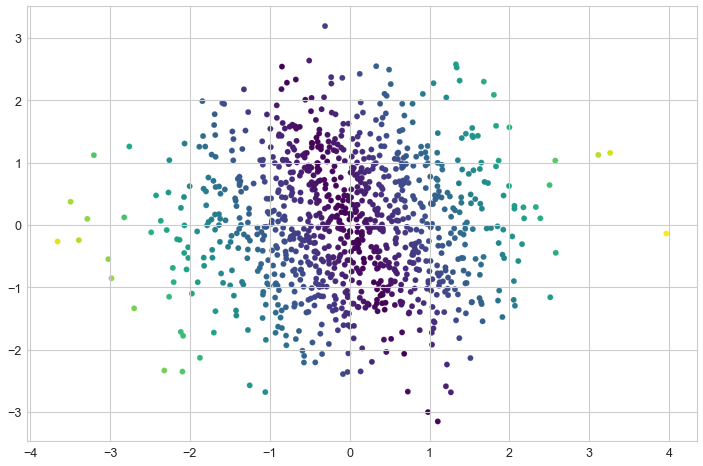

In [3]:
# Training data
plt.scatter(x = X_train[:,0], y = X_train[:,1], c = y_train)

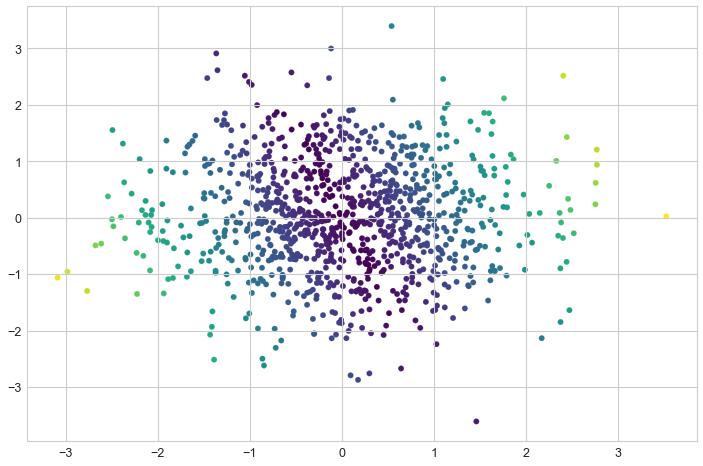

In [4]:
# Test data
plt.scatter(x = X_test[:,0], y = X_test[:,1], c = y_test)

# Complex Valued Linear Regression

In [5]:
# Manifold
X_train_ = np.array([i+i*1j for i in X_train])
X_test_ = np.array([j+j*1j for j in X_test])

In [6]:
clr = ComplexLinearRegression(n_iter=10000)

clr.fit(X_train_, y_train)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:57<00:00, 173.18it/s]


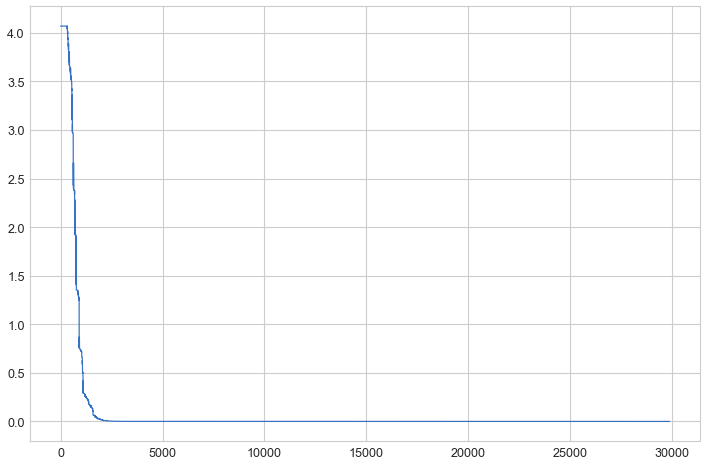

In [7]:
# Plotting loss
plt.plot(clr.loss[100:])

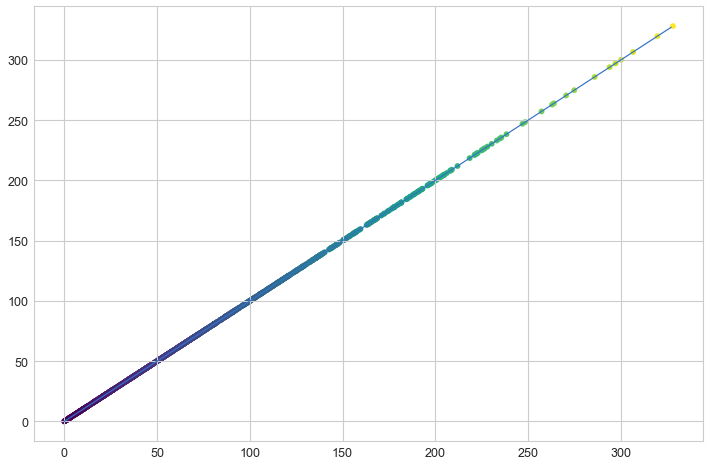

In [8]:
# Comparing predicted and expected results
plt.scatter(x = y_test, y = clr.predict(X_test_), c = clr.predict(X_test_))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

In [9]:
# Plot gradient path of variables
#history = clr.weights_history
#for j in range(history[0].shape[0]):
#    
#    fig = sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
#    plt.xlabel("Real Value")
#    plt.ylabel("Imaginary Value")
#    plt.title(f"{j} dimension path, with step count.")
#
#    plt.show()

In [10]:
print(f"MSE: {sum((y_test - clr.predict(X_test_))**2)/len(y_test)}")

MSE: 3.4030698829633262e-06


In [11]:
z = clr.weights

# Compare to Real valued Linear Regression

In [12]:
lr = LinearRegression(alpha = 0.01, n_iter=1000)

lr.fit(X_train, y_train)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 599.41it/s]


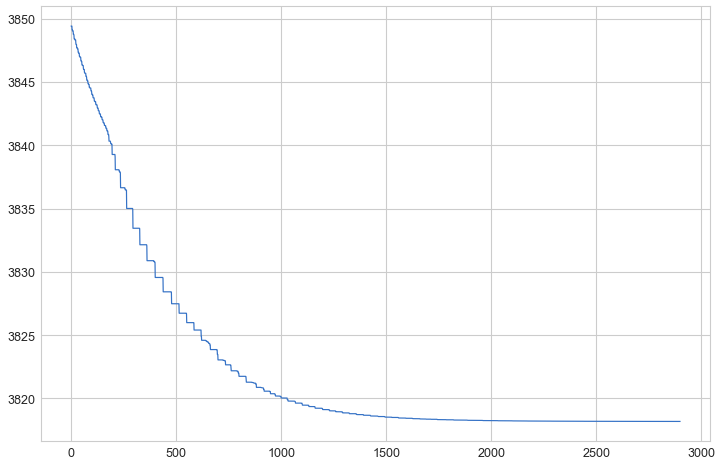

In [13]:
# Plotting loss
plt.plot(lr.loss[100:])

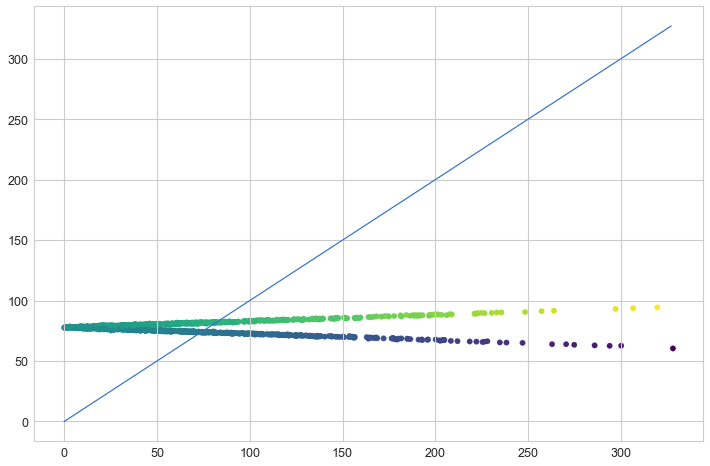

In [14]:
# Comparing predicted and expected results
plt.scatter(x = y_test, y = lr.predict(X_test), c = lr.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

In [15]:
# Plot gradient path of variables
#history = lr.weights_history
#for j in range(history[0].shape[0]):
#    
#    fig = sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
#    plt.xlabel("Iteration")
#    plt.ylabel("Real Value")
#    plt.title(f"{j} dimension path, with step count.")
#    
#    plt.show()

In [16]:
print(f"MSE: {sum((y_test - lr.predict(X_test))**2)/len(y_test)}")

MSE: 3497.421084086978


# Compare to Real valued Sklearn Linear Regression

MSE: 3497.9144911402645


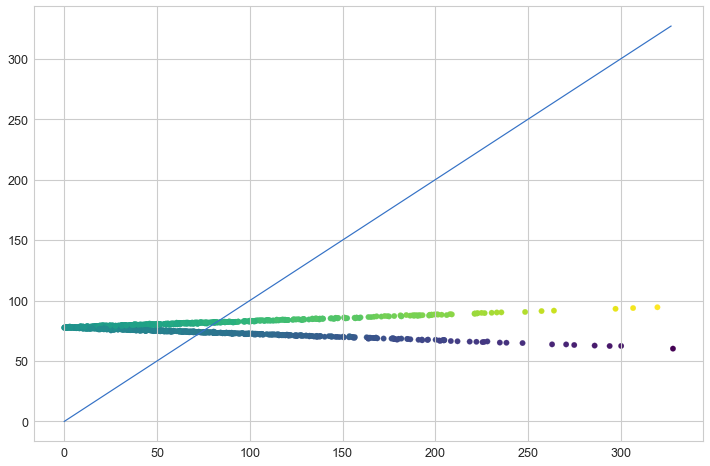

In [17]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
lin_r = SklearnLinearRegression()

lin_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = lin_r.predict(X_test), c = lin_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - lin_r.predict(X_test))**2)/len(y_test)}")

# Compare to non-linear Regression

### SGDRegressor (... This is Linear...)

MSE: 3493.593380054697


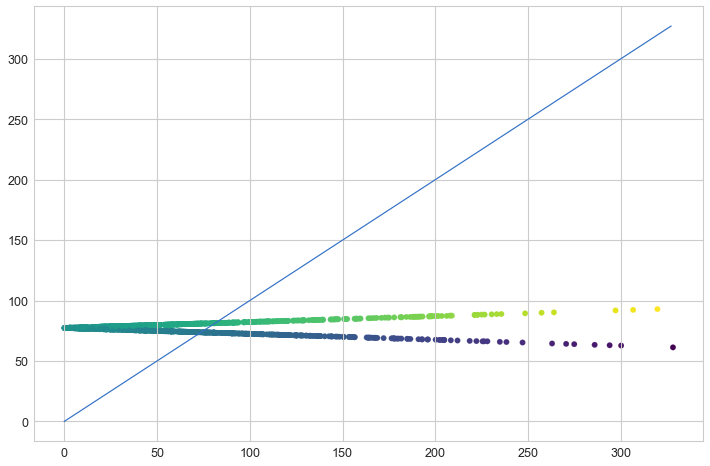

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_r = SGDRegressor()

sgd_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = sgd_r.predict(X_test), c = sgd_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - sgd_r.predict(X_test))**2)/len(y_test)}")

### MLPRegressor

MSE: 1199.5722134068913


C:\Users\daire\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


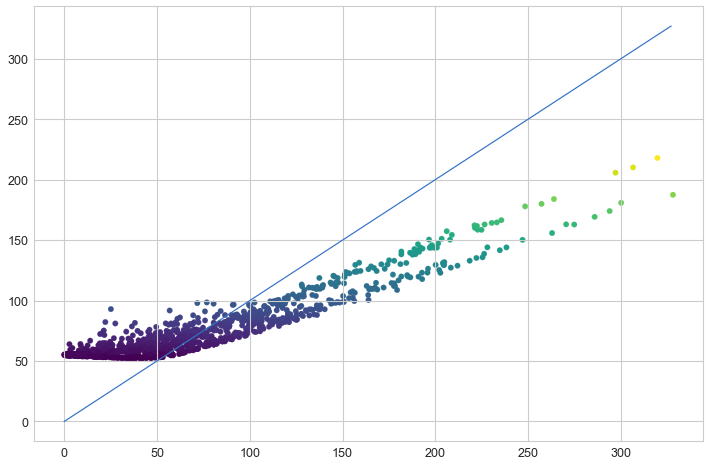

In [19]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor()

mlp_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = mlp_r.predict(X_test), c = mlp_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - mlp_r.predict(X_test))**2)/len(y_test)}")

### SVM

MSE: 565.425056865324


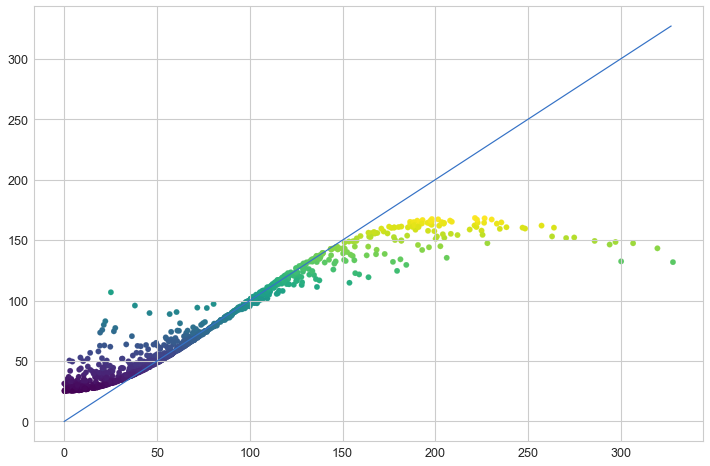

In [20]:
from sklearn.svm import SVR
svm_r = SVR()

svm_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = svm_r.predict(X_test), c = svm_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - svm_r.predict(X_test))**2)/len(y_test)}")

### RandomForestRegressor

MSE: 31.342094237027865


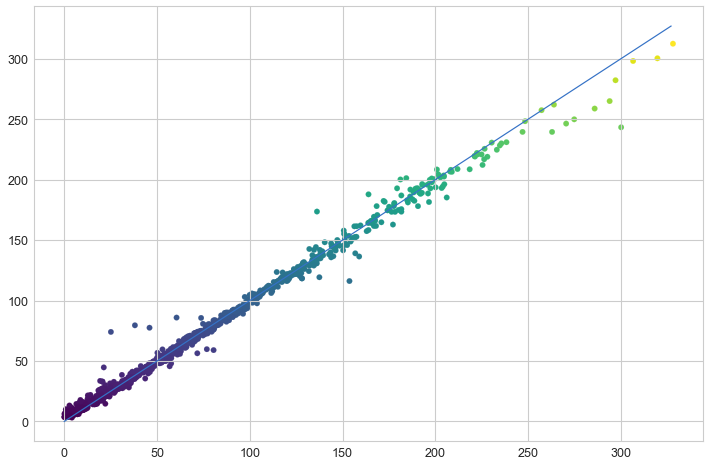

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor()

rf_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = rf_r.predict(X_test), c = rf_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - rf_r.predict(X_test))**2)/len(y_test)}")